In [ ]:
!pip install pyEDFlib

  Using cached pyEDFlib-0.1.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.7 MB)


In [ ]:
from pyedflib import highlevel
import pyedflib as plib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Then, you input the EDF file to be analyzed
# Currently only works for one EEG channel

In [ ]:
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks

y = electrocardiogram()[1000:5000] #Essentially just an array of y values in order


In [ ]:
path = "252b.edf"
signals, signal_headers, header = highlevel.read_edf(path)

OSError: 252b.edf: the file is not EDF(+) or BDF(+) compliant (Filesize)

In [ ]:
print(max(signals[0])) # note the absolute maximum/min
print(min(signals[0]))

In [ ]:
len(signals[0]) # check what is the unit for x (we want it to be in milliseconds)

In [ ]:
print(signals[0])

In [ ]:
y = signals[0] #Essentially just an array of y values in order
#y = signals[0][0:800]

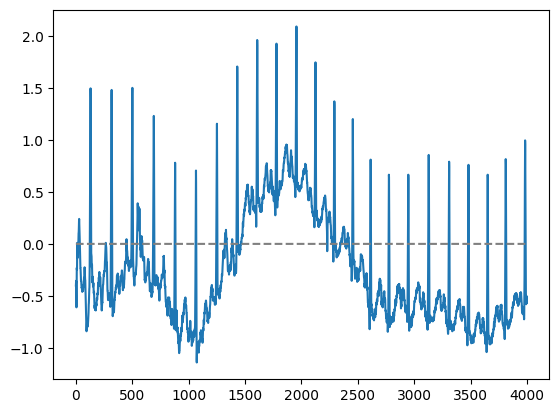

In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks


mean_y = np.mean(y)
std_y = np.std(y)
thresholds = [mean_y + 5 * std_y, mean_y - 5 * std_y]
upward_peaks_x, upward_properties = find_peaks(y, height=[thresholds[0],150],width=2) #array
downward_peaks_x, downward_properties = find_peaks(y, height=(-150,thresholds[1]),width=2)  #array
#put the two arrays together, one by a corresponding one in order as a tuple
upward_x_width = list(zip(upward_peaks_x, upward_properties['widths'])) #each one shold be (x value, width value, "Up")
downward_x_width = list(zip(downward_peaks_x, downward_properties['widths'])) #each one shold be (x value, width value, "Down")
upward_xwd = [(tu[0],tu[1],'Up') for tu in upward_x_width] #xwd = x, width, direction
downward_xwd = [(tu[0],tu[1],'Down') for tu in downward_x_width]
#concatenate the two list together and then sort by the first element in the tuple
combined_xwd = upward_xwd + downward_xwd
sorted_combined_x_width = sorted(combined_xwd, key=lambda x: x[0]) #(10,w1,"Down"),(20,w,"Up")...
# Display the sorted combined list

last_good_spike = -1000
spikes = []
ys = []
for tu in sorted_combined_x_width:
   # print(tu)
    x, width,direction = tu[0],tu[1],tu[2]
    if x-last_good_spike >=200 and width<=200 and width>= 5: #condition distance with last good peak and the total width of this single peak
        start_x = x-width/2
        end_x = x+width/2
        thresholds_for_other_peak = [mean_y + 1 * std_y, mean_y - 1 * std_y] #TODO: change it to desired threshold
        # print(f"thresholds_for_other_peak:{thresholds_for_other_peak}")
        region_y = y[int(end_x)+1-100:int(start_x)+100]
        #print(len(region_y))
       # print(f"region_y:{region_y}")
        other_peaks = []
        if direction == 'Up': #then we want to find a downward peak
            other_peaks,_ = find_peaks(region_y, height=(None,thresholds_for_other_peak[1]),width=2)
        else:
            other_peaks,_ = find_peaks(region_y, height= thresholds_for_other_peak[0],width=2)
       # print(other_peaks)
        if len(other_peaks)>0: #found specified peak
          #  print(other_peaks)
            spikes.append(x)
            last_good_spike =x


plt.plot(y)
plt.plot(spikes, y[spikes], "x")
plt.plot(np.zeros_like(y), "--", color="gray")
plt.show()

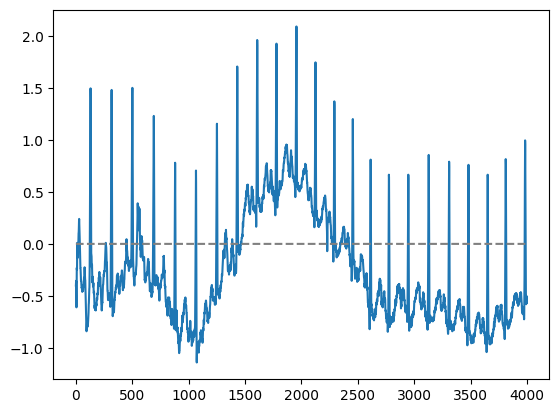

In [ ]:
#5.25 Edited Ver.
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks

def calculate_width(y, x):
    left_index = x
    right_index = x
    while left_index > 0 and y[left_index] > 0:
        left_index -= 1
    while right_index < len(y) - 1 and y[right_index] > 0:
        right_index += 1
    return left_index, right_index
mean_y = np.mean(y)
std_y = np.std(y)
thresholds = [mean_y + 5 * std_y, mean_y - 5 * std_y]
upward_peaks_x, upward_properties = find_peaks(y, height=[thresholds[0],150],width=2) #array
downward_peaks_x, downward_properties = find_peaks(y, height=(-150,thresholds[1]),width=2)  #array
#put the two arrays together, one by a corresponding one in order as a tuple
upward_x_width = list(zip(upward_peaks_x, upward_properties['widths'])) #each one shold be (x value, width value, "Up")
downward_x_width = list(zip(downward_peaks_x, downward_properties['widths'])) #each one shold be (x value, width value, "Down")
upward_xwd = [(tu[0],tu[1],'Up') for tu in upward_x_width] #xwd = x, width, direction
downward_xwd = [(tu[0],tu[1],'Down') for tu in downward_x_width]
#concatenate the two list together and then sort by the first element in the tuple
combined_xwd = upward_xwd + downward_xwd
sorted_combined_x_width = sorted(combined_xwd, key=lambda x: x[0]) #(10,w1,"Down"),(20,w,"Up")...
# Display the sorted combined list

last_good_spike = -1000
spikes = []
ys = []
for tu in sorted_combined_x_width:
   # print(tu)
    x, width,direction = tu[0],tu[1],tu[2]
    if x-last_good_spike >=200:# and width<=200 and width>= 5: #condition distance with last good peak and the total width of this single peak
        start_x,end_x = calculate_width(y,x)
        #start_x = x-width/2
        #end_x = x+width/2
        thresholds_for_other_peak = [mean_y + 1 * std_y, mean_y - 1 * std_y] #TODO: change it to desired threshold
        # print(f"thresholds_for_other_peak:{thresholds_for_other_peak}")
        region_y = y[int(end_x)+1-100:int(start_x)+100]
        #print(len(region_y))
       # print(f"region_y:{region_y}")
        other_peaks = []
        if direction == 'Up': #then we want to find a downward peak
            other_peaks,_ = find_peaks(region_y, height=(None,thresholds_for_other_peak[1]),width=2)
        else:
            other_peaks,_ = find_peaks(region_y, height= thresholds_for_other_peak[0],width=2)
       # print(other_peaks)
        if len(other_peaks)>0: #found specified peak
          #  print(other_peaks)
            spikes.append(x)
            last_good_spike =x


plt.plot(y)
plt.plot(spikes, y[spikes], "x")
plt.plot(np.zeros_like(y), "--", color="gray")
plt.show()

In [ ]:
spikes_in_ms = [x / 2000 for x in spikes]

spikes_in_ms

In [ ]:
int_value = 7200000
rng = [i for i in range(25)]
inttotal = []
spike_counts = []

# Generate the intervals
for n in rng:
    steps = int_value * n
    inttotal.append(steps)

# Initialize an empty list to store the counts
b = []

# Loop through each interval
for n in range(len(inttotal)):
    # Reset the spike_counts for each interval
    spike_counts = []
    # Count spikes within the current interval
    for i in spikes:
        if i <= inttotal[n]:
            spike_counts.append(i)
    # Append the count of spikes in the current interval to the result array
    b.append(len(spike_counts))


# Initialize a new list to store the differences
differences = [b[0]]  # Start with the first value of b

# Calculate differences between consecutive elements in b
for i in range(1, len(b)):
    diff = b[i] - b[i-1]
    differences.append(diff)
differences = differences[1:]
print(differences)